Enter stock symbols separated by commas: AAPL
Enter the start date (YYYY-MM-DD): 2020-01-01
Enter the end date (YYYY-MM-DD): 2023-01-01

[*********************100%%**********************]  1 of 1 completed

Fetching Stock Information...

Stock Information for AAPL:
Company: Company AAPL
CEO: Mr. Timothy D. Cook
Industry: Consumer Electronics
Sector: Technology
Company Performance: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the

4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=100, Dense Units=64, Dropout Rate=0.3, Mean MSE: 41.89492497661582
4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=100, Dense Units=64, Dropout Rate=0.4, Mean MSE: 62.226117570010025
4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=100, Dense Units=128, Dropout Rate=0.2, Mean MSE: 26.79289928018767
4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=100, Dense Units=128, Dropout Rate=0.3, Mean MSE: 21.275169383457047
4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=100, Dense Units=128, Dropout Rate=0.4, Mean MSE: 42.09824592070584
4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=150, Dense Units=32, Dropout Rate=0.2, Mean MSE: 30.418163545615386
4/4 [==============================] - 0s 2ms/step
Parameters: LSTM Units=150, Dense Units=32, Dropout Rate=0.3, Mean MSE: 43.239692829106005
4/4 [=

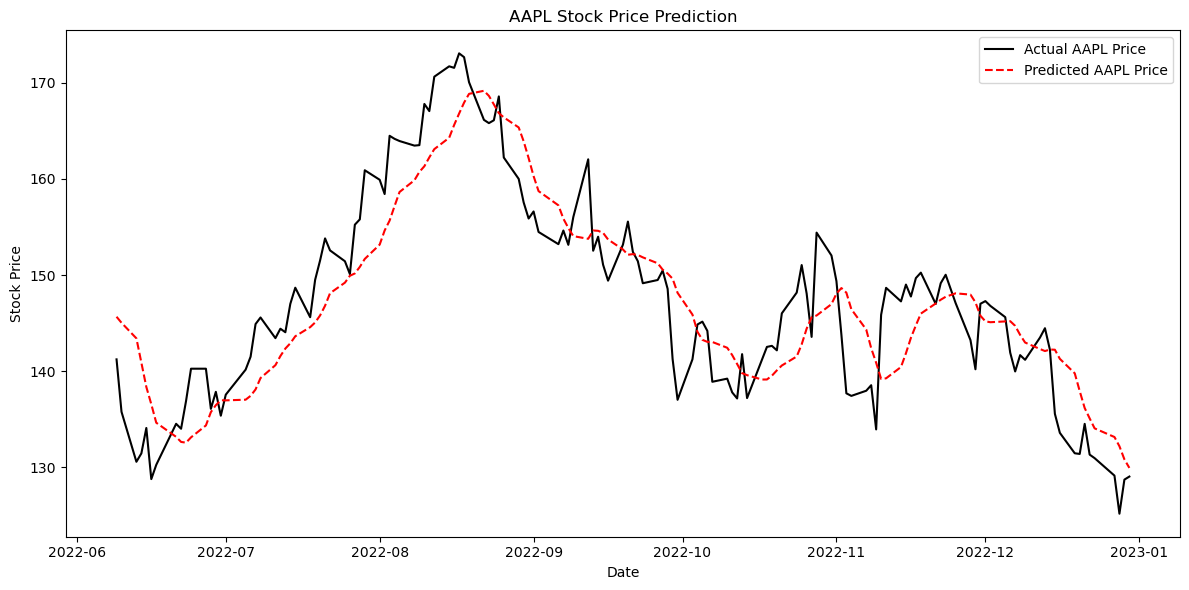


Analyzing Buy/Sell Recommendations...

Buy/Sell Analysis:
On 2022-12-30 00:00:00: Recommendation for AAPL - Sell
Reasoning:
  Predicted Price: 129.94 > Actual Price: 129.04
  Consider selling as the predicted price is higher than the actual price.
  The stock is in an uptrend.
  The RSI indicates the stock is oversold.

Performing Future Predictions...
1/1 [==============================] - 0s 6ms/step

Analysis for the next 10 days:
Predicted Prices: [141.29073, 139.78621, 137.93721, 136.17657, 135.09903, 134.05925, 133.15822, 132.19861, 130.83548, 129.94397]

Latest News for AAPL:
Tim Cook offloads nearly 200,000 shares of AAPL stock worth $32 million - Published At: 2024-04-05T17:23:02Z - Sentiment: Positive
DOJ compares AAPL share buybacks with R&D spend as ‘evidence’ of lack of competition - Published At: 2024-03-27T11:27:22Z - Sentiment: Positive
Nervous about your stocks? This pro strategy gives you income and a market edge - Published At: 2024-03-22T11:14:00Z - Sentiment: Neut

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import requests
from textblob import TextBlob

model = None

def fetch_company_information(ticker, api_key):
    base_url = "https://financialmodelingprep.com/api/v3/"
    profile_url = f"{base_url}profile/{ticker}?apikey={api_key}"
    profile_response = requests.get(profile_url)
    profile_data = profile_response.json()

    if not profile_data or 'Error' in profile_data:
        error_message = profile_data.get('Message', 'Unknown error')
        raise ValueError(f"Error fetching company information for {ticker}: {error_message}")

    company_performance = profile_data[0].get('description', 'N/A')
    ceo = profile_data[0].get('ceo', 'N/A')
    industry = profile_data[0].get('industry', 'N/A')
    sector = profile_data[0].get('sector', 'N/A')
    economic_conditions = "Interest rates, inflation, and overall economic growth can impact investor sentiment and affect the whole market."
    global_events = "Political unrest, natural disasters, and international conflicts can create uncertainty and cause market volatility."

    return company_performance, ceo, industry, sector, economic_conditions, global_events

def fetch_stock_information_with_alpha(ticker, api_key):
    alpha_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&apikey={api_key}"
    alpha_response = requests.get(alpha_url)
    alpha_data = alpha_response.json()

    if 'Error Message' in alpha_data:
        error_message = alpha_data.get('Error Message', 'Unknown error')
        raise ValueError(f"Error fetching stock information for {ticker} from Alpha Vantage: {error_message}")

    if 'Time Series (Daily)' not in alpha_data:
        raise ValueError(f"Error fetching stock information for {ticker} from Alpha Vantage: Time Series not available")

    daily_data = alpha_data['Time Series (Daily)']
    latest_date = list(daily_data.keys())[0]

    open_price = daily_data[latest_date]['1. open']
    close_price = daily_data[latest_date]['4. close']

    return open_price, close_price

def fetch_stock_information(tickers, alpha_api_key, fmp_api_key):
    stock_info = {}

    for ticker in tickers:
        try:
            company_performance, ceo, industry, sector, economic_conditions, global_events = fetch_company_information(ticker, fmp_api_key)
            open_price, close_price = fetch_stock_information_with_alpha(ticker, alpha_api_key)

            stock_info[ticker] = {
                'Company': f'Company {ticker}',
                'CEO': ceo,
                'Industry': industry,
                'Sector': sector,
                'CompanyPerformance': company_performance,
                'EconomicConditions': economic_conditions,
                'GlobalEvents': global_events,
                'OpenPrice': open_price,
                'ClosePrice': close_price,
            }
        except Exception as e:
            print(f"Error fetching stock information for {ticker}: {e}")

    return stock_info

def fetch_news_with_sentiment(api_key, ticker):
    try:
        query = f"{ticker} stock"
        news_url = f"https://newsapi.org/v2/everything"
        params = {
            'apiKey': api_key,
            'q': query,
            'pageSize': 10 
        }
        news_response = requests.get(news_url, params=params)
        news_data = news_response.json()

        if 'articles' in news_data:
            print(f"\nLatest News for {ticker}:")
            for article in news_data['articles']:
                title = article['title']
                published_at = article['publishedAt']
                sentiment_score = TextBlob(article['description']).sentiment.polarity
                sentiment = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"
                
                print(f"{title} - Published At: {published_at} - Sentiment: {sentiment}")
        else:
            print(f"Error fetching news for {ticker}: {news_data.get('message', 'Unknown error')}")
    except Exception as e:
        print(f"Error fetching news for {ticker}: {e}")

def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def plot_results(predictions, actual_prices, dates, sequence_length, tickers):
    plt.figure(figsize=(12, 6))
    for i in range(predictions.shape[1]):
        plt.subplot(predictions.shape[1], 1, i+1)
        plt.plot(dates, actual_prices[:, i], label=f'Actual {tickers[i]} Price', color='black')
        plt.plot(dates, predictions[:, i], label=f'Predicted {tickers[i]} Price', color='red', linestyle='dashed')
        plt.title(f'{tickers[i]} Stock Price Prediction')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
    plt.tight_layout()
    plt.show()

def create_model(input_shape, lstm_units, dense_units, dropout_rate, num_output_features):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=lstm_units, return_sequences=False))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=num_output_features))  
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def prepare_data(data, sequence_length=10):
    scaler = MinMaxScaler(feature_range=(0, 1))

    data_reshaped = data.values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(data_reshaped)

    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length), 0])
        y.append(scaled_data[i + sequence_length, 0])

    X, y = np.array(X), np.array(y)

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.reshape(y, (y.shape[0], 1))

    return X, y, scaler

def hyperparameter_tuning(X, y, num_output_features, scaler):
    lstm_units = [50, 100, 150]
    dense_units = [32, 64, 128]
    dropout_rates = [0.2, 0.3, 0.4]
    best_mse = float('inf')
    best_params = {}

    print("\nHyperparameter Tuning:")

    for lstm_unit in lstm_units:
        for dense_unit in dense_units:
            for dropout_rate in dropout_rates:
                mse_list = []
                tscv = TimeSeriesSplit(n_splits=5)

                for train_index, val_index in tscv.split(X):
                    X_train, X_val = X[train_index], X[val_index]
                    y_train, y_val = y[train_index], y[val_index]

                    model = create_model((X_train.shape[1], X_train.shape[2]), lstm_unit, dense_unit, dropout_rate, num_output_features)
                    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
                    predictions = model.predict(X_val)
                    predictions = scaler.inverse_transform(predictions)
                    y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))

                    mse_feature = np.mean(np.square(y_val_actual - predictions), axis=0)
                    mse_list.append(mse_feature)

                mean_mse = np.mean(mse_list)
                print(f"Parameters: LSTM Units={lstm_unit}, Dense Units={dense_unit}, Dropout Rate={dropout_rate}, Mean MSE: {mean_mse}")

                if mean_mse < best_mse:
                    best_mse = mean_mse
                    best_params = {
                        'lstm_units': lstm_unit,
                        'dense_units': dense_unit,
                        'dropout_rate': dropout_rate
                    }

    print("\nBest Hyperparameters:")
    print(f"LSTM Units: {best_params['lstm_units']}")
    print(f"Dense Units: {best_params['dense_units']}")
    print(f"Dropout Rate: {best_params['dropout_rate']}")

    return best_params

def predict_fn(X):
    return model.predict(X)

def analyze_buy_sell(predictions, actual_prices, dates, tickers):
    print("\nBuy/Sell Analysis:")

    if predictions is None or len(predictions) == 0:
        print("No predictions available.")
        return

    j = len(predictions) - 1

    if len(dates) == 0 or len(actual_prices) == 0:
        print("Insufficient data for analysis.")
        return

    date_for_analysis = dates[-1]

    for i in range(predictions.shape[1]):
        trend_reasoning = ""
        rsi_reasoning = ""

        if j >= 2:
            if actual_prices[j-1, i] > actual_prices[j-2, i] and actual_prices[j, i] > actual_prices[j-1, i]:
                trend_reasoning = "  The stock is in an uptrend."
            elif actual_prices[j-1, i] < actual_prices[j-2, i] and actual_prices[j, i] < actual_prices[j-1, i]:
                trend_reasoning = "  The stock is in a downtrend."

        if j >= 15:
            actual_index = len(actual_prices)
            gains = actual_prices[actual_index - 14:actual_index, i] - actual_prices[actual_index - 15:actual_index - 1, i]
            losses = -np.minimum(0, gains)
            avg_gain = np.mean(gains)
            avg_loss = np.mean(losses)

            if avg_loss != 0:
                rs = avg_gain / avg_loss
                rsi = 100 - (100 / (1 + rs))

                if rsi > 70:
                    rsi_reasoning = "  The RSI indicates the stock is overbought."
                elif rsi < 30:
                    rsi_reasoning = "  The RSI indicates the stock is oversold."

        if predictions[j, i] > actual_prices[j, i]:
            print(f"On {date_for_analysis}: Recommendation for {tickers[i]} - Sell")
            print("Reasoning:")
            print(f"  Predicted Price: {predictions[j, i]:.2f} > Actual Price: {actual_prices[j, i]:.2f}")
            print("  Consider selling as the predicted price is higher than the actual price.")
            print(trend_reasoning)
            print(rsi_reasoning)
        else:
            print(f"On {date_for_analysis}: Recommendation for {tickers[i]} - Buy")
            print("Reasoning:")
            print(f"  Predicted Price: {predictions[j, i]:.2f} <= Actual Price: {actual_prices[j, i]:.2f}")
            print("  Consider buying as the predicted price is equal or lower than the actual price.")
            print(trend_reasoning)
            print(rsi_reasoning)

def main():
    global model
    alpha_api_key = '1Z5OY8MFWMHIB7ZX'  
    fmp_api_key = 'zMCj7QXJ5OOcw8MRlJnh2mnQ0vpGQ4DW'
    news_api_key = '863e8bbb1cb24d4daa45bfa3e89f8cc7'

    tickers = input("Enter stock symbols separated by commas: ").split(', ')
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    print("\nDownloading Data...")
    try:
        data = download_data(tickers, start_date, end_date)

        if data.empty or len(data) < 20:
            raise ValueError("Insufficient historical data. Please provide a longer historical period.")
    except Exception as e:
        print(f"Error downloading data: {e}")
        return

    print("\nFetching Stock Information...")
    try:
        stock_info = fetch_stock_information(tickers, alpha_api_key, fmp_api_key)
        for ticker, info in stock_info.items():
            print(f"\nStock Information for {ticker}:")
            print(f"Company: {info['Company']}")
            print(f"CEO: {info['CEO']}")
            print(f"Industry: {info['Industry']}")
            print(f"Sector: {info['Sector']}")
            print(f"Company Performance: {info['CompanyPerformance']}")
            print(f"Economic Conditions: {info['EconomicConditions']}")
            print(f"Global Events: {info['GlobalEvents']}")
            print(f"Open Price: {info['OpenPrice']}")
            print(f"Close Price: {info['ClosePrice']}")
            fetch_news_with_sentiment(news_api_key, ticker)  # Fetch and analyze news
    except Exception as e:
        print(f"Error fetching stock information: {e}")
        return
    
    sequence_length = 10
    X, y, scaler = prepare_data(data, sequence_length)

    split = int(len(data) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    use_pretrained_model = input("pre-trained model? (y/n): ").lower() == 'y'
    
    if use_pretrained_model:
        pretrained_model_path = input("Enter the path to the pre-trained model file (.h5): ")
        try:
            print("\nLoading Pre-trained LSTM Model...")
            model = load_model(pretrained_model_path)
        except Exception as e:
            print(f"Error loading pre-trained model: {e}")
            return
    else:
        print("\nPerforming Hyperparameter Tuning...")
        try:
            best_params = hyperparameter_tuning(X_train, y_train, 1, scaler)
        except Exception as e:
            print(f"Error in hyperparameter tuning: {e}")
            return

        print("\nTraining the Model...")
        try:
            model = create_model((X_train.shape[1], 1), best_params['lstm_units'],
                                 best_params['dense_units'], best_params['dropout_rate'], num_output_features=1)
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        except Exception as e:
            print(f"Error training the model: {e}")
            return

    print("\nEvaluating Model Performance...")
    try:
        predictions = predict_fn(X_test)
        predictions = scaler.inverse_transform(predictions)
        actual_prices = scaler.inverse_transform(y_test)

        dates = data.index[split + sequence_length:]
        plot_results(predictions, actual_prices, dates, sequence_length, tickers)
    except Exception as e:
        print(f"Error evaluating model performance: {e}")
        return

    print("\nAnalyzing Buy/Sell Recommendations...")
    try:
        analyze_buy_sell(predictions, actual_prices, dates, tickers)
    except Exception as e:
        print(f"Error analyzing buy/sell recommendations: {e}")
        return

    print("\nPerforming Future Predictions...")
    try:
        X_future = X_test[-sequence_length:]

        future_predictions = []

        for i in range(10):
            
            predictions_batch = predict_fn(X_future[-sequence_length:])
            predictions_batch = scaler.inverse_transform(predictions_batch)
            future_predictions.append(predictions_batch[0, 0])
            X_future = np.concatenate([X_future, predictions_batch[np.newaxis, :]])

        print(f"\nAnalysis for the next 10 days:")
        print(f"Predicted Prices: {future_predictions}")
    except Exception as e:
        print(f"Error performing future predictions: {e}")
        return
    
    # this code is for sentiment analysis *need fixing*
    try:
        for ticker in tickers:
            fetch_news_with_sentiment(news_api_key, ticker)
    except Exception as e:
        print(f"Error fetching or analyzing news sentiment: {e}")
        return
    
    try:
        X_future = X_test[-sequence_length:]

        future_predictions = []

        for i in range(10):
            
            predictions_batch = predict_fn(X_future[-sequence_length:])
            predictions_batch = scaler.inverse_transform(predictions_batch)
            future_predictions.append(predictions_batch[0, 0])
            X_future = np.concatenate([X_future, predictions_batch[np.newaxis, :]])

        print(f"\nAnalysis for the next 10 days:")
        print(f"Predicted Prices: {future_predictions}")
    except Exception as e:
        print(f"Error performing future predictions: {e}")
        return
    user_budget = float(input("Enter your budget in USD : "))
    for ticker, info in stock_info.items():
        current_price = float(info['ClosePrice'])
        num_shares = user_budget / current_price
        print(f"With a budget of ${user_budget}, you can buy {num_shares:.2f} shares of {ticker}.")
        
        news_api_key = 'Z1oNEfSwDK5HzU2OU9dj25GO7pvkqRzla3qEfyNe'

        for ticker in tickers:
            
            try:
                news_url = f"https://api.marketaux.com/v1/news/all?apiKey={news_api_key}"
                news_response = requests.get(news_url)
                news_data = news_response.json()

                if 'articles' in news_data:
                    print(f"\nLatest News for {ticker}:")
                    for article in news_data['articles']:
                        print(f"{article['title']} - {article['publishedAt']}")
            except Exception as e:
                print(f"Error fetching news for {ticker}: {e}")

main()
